In [1]:
import ee
import geemap
import os

In [2]:
ee.Authenticate()
ee.Initialize(project='ee-eslamelnahas-jupyter')


In [7]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [9]:
image = ee.Image("LANDSAT/LE7_TOA_5YEAR/1999_2003")

landsat_vis = {"bands": ["B4", "B3", "B2"], "gamma": 1.4}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 0.7)

In [11]:
# feature = Map.draw_last_feature
# coords = feature.geometry().coordinates().getInfo()

# print(coords)

In [13]:
# Draw any shapes on the map using the Drawing tools before executing this code block
feature = Map.draw_last_feature
if feature is None:
    geom = ee.Geometry.Polygon(
       [[[30.920938, 30.75831], [30.920938, 31.660346], [32.112804, 31.660346], [32.112804, 30.75831], [30.920938, 30.75831]]]
    )
    feature = ee.Feature(geom, {})

roi = feature.geometry()

In [15]:
out_dir = os.path.join(os.path.expanduser("~"), "Downloads")
filename = os.path.join(out_dir, "landsat.tif")

# Exporting all bands as one single image

In [18]:
image = image.clip(roi).unmask()
geemap.ee_export_image(image, filename=filename, scale=90, region=roi, file_per_band=False)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\Lenovo\Downloads\landsat.tif


# Exporting each band as one image

In [29]:
geemap.ee_export_image(
    image, filename=filename, scale=70, region=roi, file_per_band=True
)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\Lenovo\Downloads


# Export an image to Google Drive


In [47]:
geemap.ee_export_image_to_drive(
    image, description="landsat", folder="export", region=roi, scale=10
)


# Download an ee.ImageCollection


In [33]:
import ee
import geemap
import os

In [35]:
loc = ee.Geometry.Point(-99.2222, 46.7816)
collection = (
    ee.ImageCollection("USDA/NAIP/DOQQ")
    .filterBounds(loc)
    .filterDate("2008-01-01", "2020-01-01")
    .filter(ee.Filter.listContains("system:band_names", "N"))
)

In [37]:
out_dir = os.path.join(os.path.expanduser("~"), "Downloads")

In [39]:
print(collection.aggregate_array("system:index").getInfo())

['m_4609915_sw_14_060_20180902_20181213', 'm_4609915_sw_14_060_20190626', 'm_4609915_sw_14_1_20090818', 'm_4609915_sw_14_1_20100629', 'm_4609915_sw_14_1_20120714', 'm_4609915_sw_14_1_20140901', 'm_4609915_sw_14_1_20150926', 'm_4609915_sw_14_h_20160704', 'm_4609915_sw_14_h_20170703']


In [43]:
geemap.ee_export_image_collection(collection, out_dir=out_dir,scale=10)

Total number of images: 9

Exporting 1/9: C:\Users\Lenovo\Downloads\m_4609915_sw_14_060_20180902_20181213.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Lenovo\Downloads\m_4609915_sw_14_060_20180902_20181213.tif


Exporting 2/9: C:\Users\Lenovo\Downloads\m_4609915_sw_14_060_20190626.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Lenovo\Downloads\m_4609915_sw_14_060_20190626.tif


Exporting 3/9: C:\Users\Lenovo\Downloads\m_4609915_sw_14_1_20090818.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Lenovo\Downloads\m_4609915_sw_14_1_20090818.tif


Exporting 4/9: C:\Users\Lenovo\Downloads\m_4609915_sw_14_1_20100629.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Lenovo\Downloads\m_4609915_sw_14_1_20100629.tif


Exporting 5/9: C:\Users\Lenovo\Downloads\m_4609915_sw_14_1_20120714.tif
Generating URL ...
Please wait ...
Data downloaded to C:\Users\Lenovo\Downloads\m_4609915_sw_14_1_20120714.tif


Exporting 6/9: C:\User

In [51]:
geemap.ee_export_image_collection_to_drive(collection, folder="Landsat", scale=10)

Total number of images: 9



# Extract pixels as a Numpy array

In [47]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image("USGS/SRTMGL1_003").select('elevation')

aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(361, 721, 1)


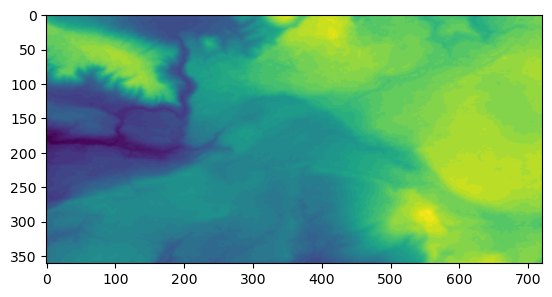

In [49]:
# Scale the data to [0, 255] to show as an RGB image.
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten
rgb_img_test = (255 * ((rgb_img[:, :, 0:3] - 100) / 3500)).astype("uint8")
plt.imshow(rgb_img_test)
plt.show()